In [ ]:
# https://www.kaggle.com/datasets/shivamkushwaha/bbc-full-text-document-classification
!wget -nc https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv

--2023-12-28 03:50:34--  https://lazyprogrammer.me/course_files/nlp/bbc_text_cls.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5085081 (4.8M) [text/csv]
Saving to: ‘bbc_text_cls.csv’

bbc_text_cls.csv    100%[===================>]   4.85M   746KB/s    in 15s     

2023-12-28 03:50:51 (337 KB/s) - ‘bbc_text_cls.csv’ saved [5085081/5085081]



In [ ]:
from transformers import pipeline
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import textwrap
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

In [ ]:
classifier = pipeline("zero-shot-classification", device=0)

No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
classifier("This is a great movie", candidate_labels=["positive", "negative"])

{'sequence': 'This is a great movie',
 'labels': ['positive', 'negative'],
 'scores': [0.9969461560249329, 0.0030538279097527266]}

In [ ]:
text = "Due to the presence of isoforms of its components, there are 12 "+\
"versions of AMPK in mammals, eacho of which can have different tissue " +\
"localizations, and different functions under different conditions. " +\
"AMPK is regulatedd allosterically and by post-translational " +\
"modification, which work together."

classifier(text, candidate_labels=["biology", "math", "geology"])

{'sequence': 'Due to the presence of isoforms of its components, there are 12 versions of AMPK in mammals, eacho of which can have different tissue localizations, and different functions under different conditions. AMPK is regulatedd allosterically and by post-translational modification, which work together.',
 'labels': ['biology', 'math', 'geology'],
 'scores': [0.8918544054031372, 0.0659891664981842, 0.04215642437338829]}

In [ ]:
df = pd.read_csv('/content/bbc_text_cls.csv')

In [ ]:
df.head()

,text,labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business
3,High fuel prices hit BA's profits\n\nBritish A...,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business


In [ ]:
len(df)

2225

In [ ]:
df.sample(frac=1).head()

,text,labels
198,Georgia plans hidden asset pardon\n\nGeorgia i...,business
944,Clarke to press on with ID cards\n\nNew Home S...,politics
2148,Mobile audio enters new dimension\n\nAs mobile...,tech
499,Low-cost airlines hit Eurotunnel\n\nChannel Tu...,business
1218,"Kennedy predicts bigger turnout\n\nVoters' ""pe...",politics


In [ ]:
labels = list(set(df['labels']))
labels

['tech', 'entertainment', 'politics', 'business', 'sport']

In [ ]:
# print out a random document
print(textwrap.fill(df.iloc[1024]['text']))

UK troops on Ivory Coast standby  Downing Street has confirmed British
troops are on standby in case they need to help evacuate several
hundred UK citizens from Ivory Coast.  The news came as it emerged
France had begun evacuating its hostages after days of anti-French
demonstrations. Trouble flared after nine French peacekeepers were
killed and President Jacques Chirac ordered the destruction of the
Ivory Coast's air force. A company of 100-120 UK troops is understood
to have been put on standby. They are ready to fly out and secure the
route from the embassy to the airport if called upon. Prime Minister
Tony Blair's official spokesman said: "There are British nationals in
Ivory Coast and as you can imagine we are making the usual contingency
plans in case the situation deteriorates further, but that's all I can
say at this stage."  He added the situation would be monitored
carefully in case evacuation became necessary. France has played a
lead role in international peacekeeping in Iv

In [ ]:
df.iloc[1024]['labels']

'politics'

In [ ]:
classifier(df.iloc[1024]['text'], candidate_labels=labels)

{'sequence': 'UK troops on Ivory Coast standby\n\nDowning Street has confirmed British troops are on standby in case they need to help evacuate several hundred UK citizens from Ivory Coast.\n\nThe news came as it emerged France had begun evacuating its hostages after days of anti-French demonstrations. Trouble flared after nine French peacekeepers were killed and President Jacques Chirac ordered the destruction of the Ivory Coast\'s air force. A company of 100-120 UK troops is understood to have been put on standby. They are ready to fly out and secure the route from the embassy to the airport if called upon. Prime Minister Tony Blair\'s official spokesman said: "There are British nationals in Ivory Coast and as you can imagine we are making the usual contingency plans in case the situation deteriorates further, but that\'s all I can say at this stage."\n\nHe added the situation would be monitored carefully in case evacuation became necessary. France has played a lead role in internati

In [ ]:
preds = classifier(df['text'].tolist(), candidate_labels=labels)

In [ ]:
type(preds)

list

In [ ]:
preds[:2]

[{'sequence': 'Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL\'s underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and w

In [ ]:
predicted_labels = [d['labels'][0] for d in preds]

In [ ]:
df['predicted_labels'] = predicted_labels

In [ ]:
print("Accuracty: ", np.mean(df['predicted_labels'] == df['labels']))

Accuracty:  0.5649438202247191


In [ ]:
# compute the matrix of probabilities
# in our results, we only have string labels and scores, so we know which scores map to which label
# but twe don't know which scores map to which column of this probability matrix
# therefore we need a mapping from string label to index
# by always using this mapping we can ensure that our scores are always in a consistent order
# Convert prediction probs into an NxK matrix according to
# original label order

N = len(df)  # number of samples
K = len(labels)  # number of classes
label2idx = {v:k for k,v in enumerate(labels)}

In [ ]:
label2idx

{'tech': 0, 'entertainment': 1, 'politics': 2, 'business': 3, 'sport': 4}

In [ ]:

probs = np.zeros((N, K))   #instantiate the probability matrix
for i in range(N):
  # loop through labels and scores in corresponding order
  d = preds[i]  # grab the prediction dictionary at index i and assign in d
  for label, score in zip(d['labels'], d['scores']): #loop through the labels and scores in d
    k = label2idx[label]  # pass in the label and get back the index which corresponds the column of our matrix
    probs[i, k] = score  # storing score at row i, column k


In [ ]:
probs[:5]

array([[0.18689637, 0.16224159, 0.07622872, 0.51250112, 0.0621322 ],
       [0.11524656, 0.12214269, 0.21031426, 0.43145531, 0.1208412 ],
       [0.15931854, 0.0476478 , 0.37659582, 0.35858241, 0.05785542],
       [0.11751942, 0.07253766, 0.05838171, 0.69412309, 0.05743808],
       [0.08543925, 0.11178225, 0.10705889, 0.59033376, 0.1053858 ]])

In [ ]:
df.head()

,text,labels,predicted_labels
0,Ad sales boost Time Warner profit\n\nQuarterly...,business,business
1,Dollar gains on Greenspan speech\n\nThe dollar...,business,business
2,Yukos unit buyer faces loan claim\n\nThe owner...,business,politics
3,High fuel prices hit BA's profits\n\nBritish A...,business,business
4,Pernod takeover talk lifts Domecq\n\nShares in...,business,business


In [ ]:
int_labels = [label2idx[x] for x in df['labels']]
int_labels[:5]

[3, 3, 3, 3, 3]

In [ ]:
int_preds = np.argmax(probs, axis=1)
print(int_preds[:5])
cm = confusion_matrix(int_labels, int_preds, normalize='true')

[3 3 2 3 3]


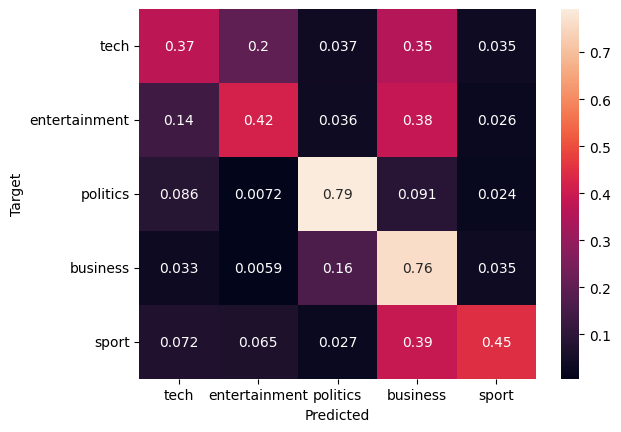

In [ ]:
def plot_cm(cm):
  df_cm = pd.DataFrame(cm, index=labels, columns=labels)
  ax = sn.heatmap(df_cm, annot=True, fmt='.2g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

In [ ]:
# f1_score is more naturally defined for binary classes thus to use it for multiclass we need set average=micro
f1_score(df['labels'], predicted_labels, average='micro')

0.5649438202247191

In [ ]:
# this is also naturally defined for binary case, to use it for multiclass case we need to set multiclass='ovo'
roc_auc_score(int_labels, probs, multi_class='ovo')

0.8853266860793887